## How transfer learning works:
<b>Part 1:</b> Train the Backbone
1. Train a CNN (for example Resnet) on a large scale dataset like ImageNet where it learns how to create useful feature maps.
    - This reduces image dimensions and increases the number of channels
2. Do some pooling on the feature maps, then flatten and input into fully connected layers that predict the 1000 categories of ImageNet

<b>Part 2:</b> Use Backbone to form final model.
1. Get rid of the last layer that predicts the 1000 categories of ImageNet and instead make the output just the number of neurons you need.
2. You can freeze the weights of the convolutional layers, if you do then this is called the feature extraction method.
3. Retrain on your data so the final fully connected layers improve.


In [25]:
# Imports

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from torchvision import datasets, models, transforms
import time
import os
import copy
from colored import Fore, Style


plt.ion()   # interactive mode, damn didnt even know this existed

device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # use gpu if available

## Data Augmentation Techniques

- transforms.RandomResizedCrop(224):
    - New image is a random crop of original image of size 224x224
- transforms.RandomHorizontalFlip():
    - Image is transformed with a horizontal flip 50% of the time
- transforms.toTensor():
    - Just converts the 3 channel image into a Tensor
- transforms.Normalize():
    - 2 main Benifits:
        - Zero-Centering: Subtracting the mean of the pixel values makes the mean of the data approximately zero. This helps ensure that the network doesn't learn spurious biases based on the overall brightness or color of the images in the dataset.
        - Scaling: Dividing by the standard deviation scales the pixel values, making them have a roughly consistent magnitude. This can help the training process converge faster and be more numerically stable.




In [26]:
mean = np.array([0.485, 0.456, 0.406]) # mean of imagenet dataset
std = np.array([0.229, 0.224, 0.225])  # std of imagenet dataset

dataTransforms = {
    'train': 
        transforms.Compose([
        transforms.RandomResizedCrop(224),          # crop image to 224x224
        transforms.RandomHorizontalFlip(),          # flip image horizontally
        transforms.ToTensor(),                      # convert image to tensor
        transforms.Normalize(mean, std)]),          # normalize image
        
    'val': 
        transforms.Compose([
        transforms.Resize(256),                     # resize image to 256x256
        transforms.CenterCrop(224),                 # crop image to 224x224
        transforms.ToTensor(),                      # convert image to tensor
        transforms.Normalize(mean, std)]),          # normalize image
    
    'test': 
        transforms.Compose([
        transforms.Resize(256),                     # resize image to 256x256
        transforms.CenterCrop(224),                 # crop image to 224x224
        transforms.ToTensor(),                      # convert image to tensor
        transforms.Normalize(mean, std)]),          # normalize image
}

In [27]:
data_dir = 'dataset'
sets = ['train', 'val', 'test']

image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), dataTransforms[x]) for x in sets} # create datasets
dataLoader = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=4) for x in sets} # create dataloaders

print(image_datasets['train']) # Check if it worked

class_names = image_datasets['train'].classes

Dataset ImageFolder
    Number of datapoints: 600
    Root location: dataset\train
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=[0.485 0.456 0.406], std=[0.229 0.224 0.225])
           )


### Ripped code for displaying data from Pytorch website: 

(228, 906, 3)
(228, 906, 3)


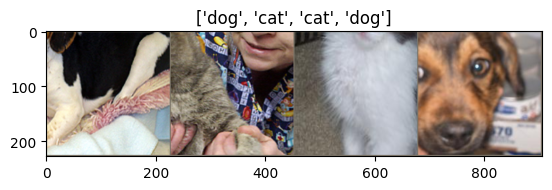

In [28]:
def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    print(inp.shape)
    inp = std * inp + mean
    print(inp.shape)
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataLoader['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [29]:
def trainModel(model, epochs = 25):
    since = time.time()
    
    for epoch in range(epochs):
        # Print Epoch Number:
        print(f'{Fore.yellow}Epoch:{Style.reset} ', end="")
        print(f'{epoch+1}/{epochs}')
        print('—' * 10)
        
        
trainModel("model")

Epoch: 1/25
——————————
Epoch: 2/25
——————————
Epoch: 3/25
——————————
Epoch: 4/25
——————————
Epoch: 5/25
——————————
Epoch: 6/25
——————————
Epoch: 7/25
——————————
Epoch: 8/25
——————————
Epoch: 9/25
——————————
Epoch: 10/25
——————————
Epoch: 11/25
——————————
Epoch: 12/25
——————————
Epoch: 13/25
——————————
Epoch: 14/25
——————————
Epoch: 15/25
——————————
Epoch: 16/25
——————————
Epoch: 17/25
——————————
Epoch: 18/25
——————————
Epoch: 19/25
——————————
Epoch: 20/25
——————————
Epoch: 21/25
——————————
Epoch: 22/25
——————————
Epoch: 23/25
——————————
Epoch: 24/25
——————————
Epoch: 25/25
——————————


In [48]:
tensor = torch.tensor([[-1, 2, 3], [4, -5, 6]])
print(tensor)
tensor = F.relu(tensor)
print(tensor)

print(F.relu_.__doc__)

tensor([[-1,  2,  3],
        [ 4, -5,  6]])
tensor([[0, 2, 3],
        [4, 0, 6]])

relu_(input) -> Tensor

In-place version of :func:`~relu`.



In [49]:
dir(F)

['BroadcastingList1',
 'BroadcastingList2',
 'BroadcastingList3',
 'Callable',
 'DType',
 'GRID_SAMPLE_INTERPOLATION_MODES',
 'GRID_SAMPLE_PADDING_MODES',
 'List',
 'Optional',
 'TYPE_CHECKING',
 'Tensor',
 'Tuple',
 'Union',
 '_Reduction',
 '_VF',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_adaptive_max_pool1d',
 '_adaptive_max_pool2d',
 '_adaptive_max_pool3d',
 '_add_docstr',
 '_canonical_mask',
 '_fractional_max_pool2d',
 '_fractional_max_pool3d',
 '_get_softmax_dim',
 '_in_projection',
 '_in_projection_packed',
 '_infer_size',
 '_list_with_default',
 '_max_pool1d',
 '_max_pool2d',
 '_max_pool3d',
 '_mha_shape_check',
 '_no_grad_embedding_renorm_',
 '_none_or_dtype',
 '_overload',
 '_pair',
 '_single',
 '_sym_int',
 '_threshold',
 '_triple',
 '_unpool_output_size',
 '_verify_batch_size',
 '_verify_spatial_size',
 'adaptive_avg_pool1d',
 'adaptive_avg_pool2d',
 'adaptive_avg_pool3d',
 'adaptive_max_pool1d',
 'ad